#Домашнее задание № 3. Модели ARMA.

##Загрузим необходимые данные

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# загрузим данные
!wget 'https://u.netology.ru/backend/uploads/lms/attachments/files/data/47497/1._Лекция_tsml.zip'

--2025-02-24 06:33:34--  https://u.netology.ru/backend/uploads/lms/attachments/files/data/47497/1._%D0%9B%D0%B5%D0%BA%D1%86%D0%B8%D1%8F_tsml.zip
Resolving u.netology.ru (u.netology.ru)... 213.180.193.247, 2a02:6b8::1da
Connecting to u.netology.ru (u.netology.ru)|213.180.193.247|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 769056 (751K) [application/x-zip-compressed]
Saving to: ‘1._Лекция_tsml.zip’

1._Лекция_tsml.zip  100%[===================>] 751.03K   442KB/s    in 1.7s    

2025-02-24 06:33:38 (442 KB/s) - ‘1._Лекция_tsml.zip’ saved [769056/769056]



In [3]:
# распакуем
import zipfile

with zipfile.ZipFile('/content/1._Лекция_tsml.zip', 'r') as zip_ref:
    zip_ref.extractall('unpacked_files')

В качестве ряда для анализа выберу monthly_boston_armed_robberies_j. Он мне кажется самым интересным.

In [4]:
# 2. ежемесячные_бостонские вооруженные_ ограбления_j
monthly_boston_armed_robberies_j = pd.read_csv('/content/unpacked_files/Series/monthly-boston-armed-robberies-j.csv')

In [5]:
series = monthly_boston_armed_robberies_j['Count']

In [6]:
# вывод графика
def chart(series, title='Временной ряд'):
    plt.figure(figsize=(14, 7))
    plt.plot(series, label=title)
    plt.title(title)
    plt.xlabel('Время')
    plt.ylabel('Величина')
    plt.grid(False)
    plt.legend()
    plt.show()

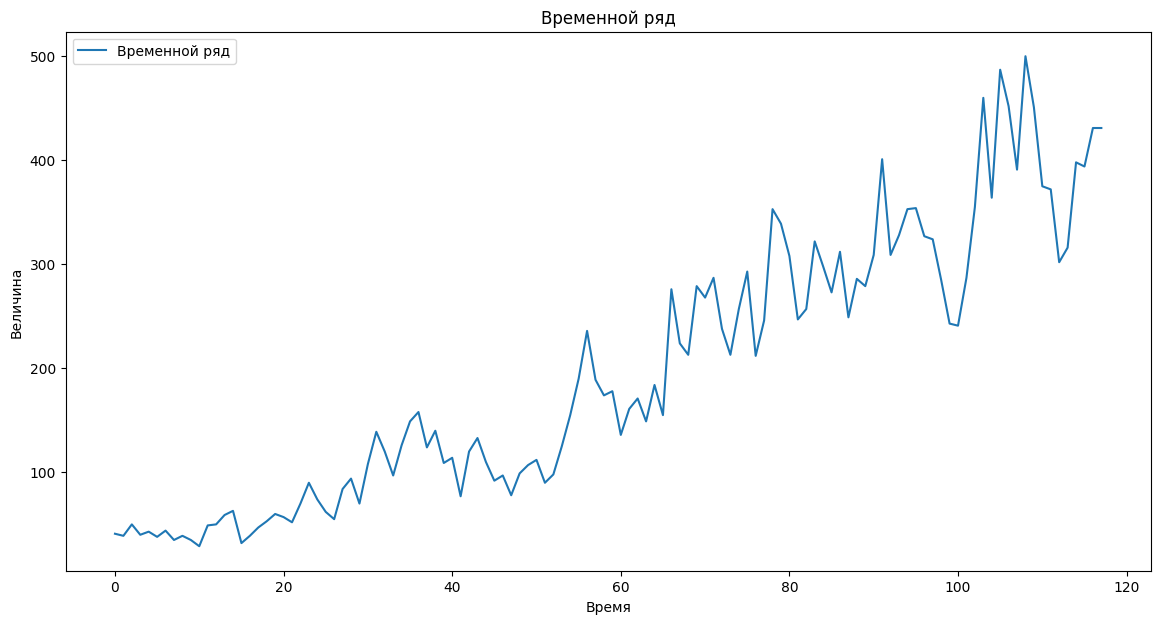

In [7]:
# еще раз на него посмотрим
chart(series)

##Модель ARIMA

Воспользуюсь оригинальным рядом. Т.к. данная модель приводит к стационарности самостоятельно.

In [25]:
# загрузим библиотеки
from statsmodels.tsa.arima.model import ARIMA
import itertools

In [53]:
# отключаем сообщения об ошибках
import warnings
warnings.filterwarnings('ignore')

# для поиска наилучших параметров воспользуемся поиском по сетке
p = range(0,15)
d = q = range(0,3)
pdq = list(itertools.product(p, d, q))
print(f'Всего рассмотрим {len(pdq)} вариантов')
best_pdq = (0,0,0)

# для поиска лучшей модели воспользуемся информационным критерием aic.
# AIC — Akaike Information Criterion). AIC оценивает, насколько хорошо модель подходит под данные.
# чем меньше AIC – тем точнее модель
best_aic = np.inf

for params in pdq:
    model_test = ARIMA(series, order=params)
    result_test = model_test.fit()

    if result_test.aic < best_aic:
        best_pdq = params
        best_aic = result_test.aic
        result = result_test
print(best_pdq, best_aic)

Всего рассмотрим 135 вариантов
(11, 2, 1) 1170.5123599546882


In [54]:
# проверим оптимальность модели
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Count   No. Observations:                  118
Model:                ARIMA(11, 2, 1)   Log Likelihood                -572.256
Date:                Mon, 24 Feb 2025   AIC                           1170.512
Time:                        07:46:04   BIC                           1206.309
Sample:                             0   HQIC                          1185.044
                                - 118                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4821      0.096     -4.998      0.000      -0.671      -0.293
ar.L2         -0.4306      0.081     -5.336      0.000      -0.589      -0.272
ar.L3         -0.2631      0.110     -2.402      0.016      -0.478      -0.048
ar.L4         -0.4375      0.104     -4.189      0.000      -0.642      -0.233
ar.L5         -0.2273      0.109     -2.077      0.038      -0.442      -0.013
ar.L6         -0.3339      0.096     -3.461      0.001      -0.523      -0.145
ar.L7         -0.4220      0.101     -4.198      0.000      -0.619      -0.225
ar.L8         -0.2848      0.117     -2.440      0.015      -0.513      -0.056
ar.L9         -0.3873      0.112     -3.447      0.001      -0.608      -0.167
ar.L10        -0.4829      0.130     -3.709      0.000      -0.738      -0.228
ar.L11        -0.2770      0.100     -2.767      0.006      -0.473      -0.081
ma.L1         -0.9689      0.034    -28.236      0.000      -1.036      -0.902
sigma2      1041.5759    125.746      8.283      0.000     795.119    1288.033
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                21.30
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):               5.56   Skew:                             0.72
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.53
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

Здесь нас интересует таблица коэффициентов. Столбец coef показывает влияние каждого параметра на временной ряд, а P>|z| — значимость. Чем ближе значение P>|z| к нулю, тем выше значимость.

Вторым методом модели, который может помочь в оценке модели — plot_diagnostics().

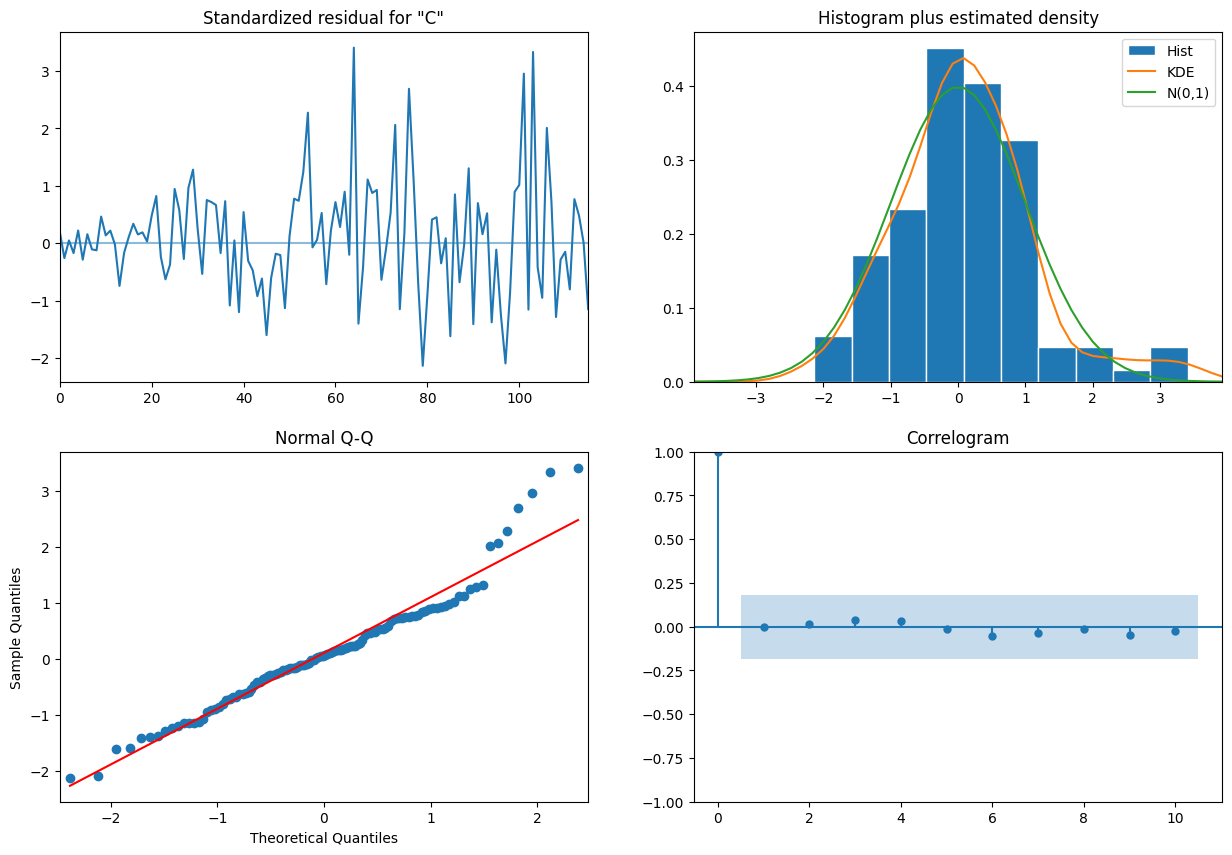

In [55]:
result.plot_diagnostics(figsize=(15, 10))
plt.show()

Остатки имеют нормальное распределение и близкую к нулю в автокорреляции.



###Прогнозирование и оценка точности прогноза.

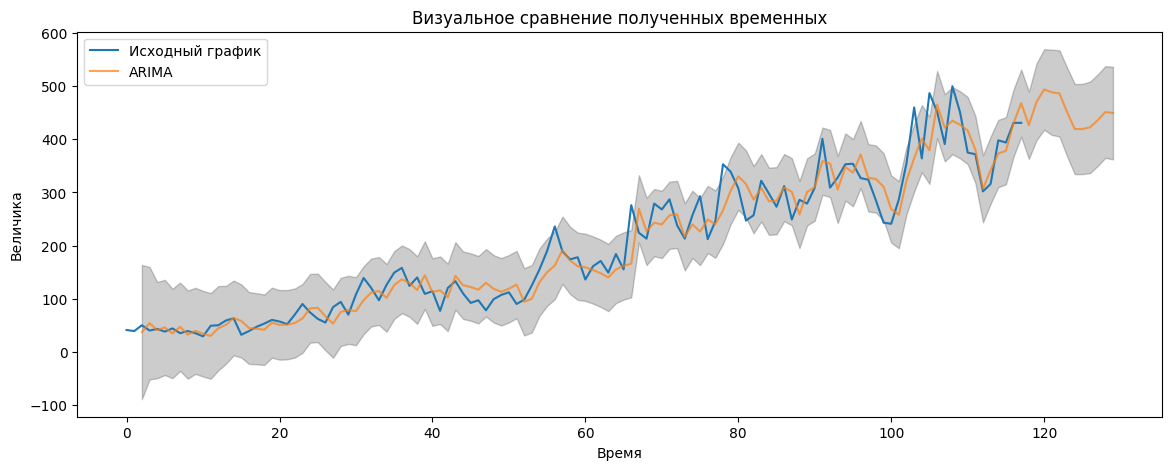

In [74]:
pred = result.get_prediction(start=2, end=129, dynamic=False)
pred_ci = pred.conf_int()

ax = series.plot(label='Исходный график', figsize=(14, 5))
pred.predicted_mean.plot(ax=ax, label='ARIMA', alpha=.7)
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2
               )
plt.title('Визуальное сравнение полученных временных')
ax.set_xlabel('Время')
ax.set_ylabel('Величика')
plt.legend()
plt.show()

Рассмотрим среднюю абсолютную процентную ошибку (MAPE – Mean Absolute Percent Error):

In [72]:
forecasted = pred.predicted_mean
actual = series
mape = np.mean(np.abs((actual-forecasted)/actual))*100
mape

15.236695024733105